##  Import Libraries

# Exploratory Data Analysis

We'll being by looking at data provided each year

## Allegations by year

In [ ]:
tot19 = fy19.shape[0]
tot19

213

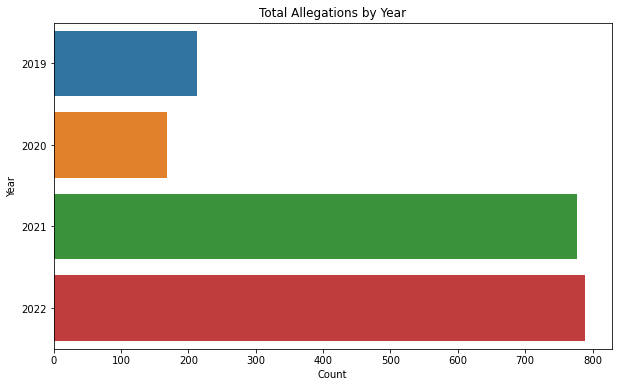

In [ ]:
# Total complaints by year
tot19 = pd.DataFrame({'Count': [fy19.shape[0]]}, index=['2019'])
tot20 = pd.DataFrame({'Count': [fy20.shape[0]]}, index=['2020'])
tot21 = pd.DataFrame({'Count': [fy21.shape[0]]}, index=['2021'])
tot22 = pd.DataFrame({'Count': [fy22.shape[0]]}, index=['2022'])

tot_counts = pd.concat([tot19, tot20, tot21, tot22])

# Reset index
tot_counts.reset_index(inplace=True)
tot_counts.columns = ['Year', 'Count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_counts, x='Count', y='Year')
plt.title('Total Allegations by Year')
plt.xlabel('Count')
plt.ylabel('Year')
plt.show()


## Allegations by year and gender

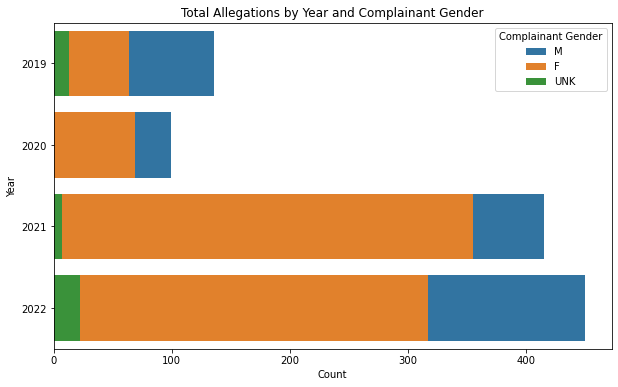

In [ ]:
# Total complaints by year
tot19 = pd.DataFrame({'Year': ['2019'], 'Count': [fy19.shape[0]], 'complainant_gender': ['Total']})
tot20 = pd.DataFrame({'Year': ['2020'], 'Count': [fy20.shape[0]], 'complainant_gender': ['Total']})
tot21 = pd.DataFrame({'Year': ['2021'], 'Count': [fy21.shape[0]], 'complainant_gender': ['Total']})
tot22 = pd.DataFrame({'Year': ['2022'], 'Count': [fy22.shape[0]], 'complainant_gender': ['Total']})

tot_counts = pd.concat([tot19, tot20, tot21, tot22])

# Complainant gender counts by year
gender_counts_19 = fy19['complainant_gender'].value_counts().reset_index()
gender_counts_19['Year'] = '2019'
gender_counts_20 = fy20['complainant_gender'].value_counts().reset_index()
gender_counts_20['Year'] = '2020'
gender_counts_21 = fy21['complainant_gender'].value_counts().reset_index()
gender_counts_21['Year'] = '2021'
gender_counts_22 = fy22['complainant_gender'].value_counts().reset_index()
gender_counts_22['Year'] = '2022'

gender_counts = pd.concat([gender_counts_19, gender_counts_20, gender_counts_21, gender_counts_22])
gender_counts.columns = ['complainant_gender', 'Count', 'Year']

# Combine total complaints and gender counts
combined_counts = pd.concat([tot_counts, gender_counts])

# Create the stacked bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_counts, x='Count', y='Year', hue='complainant_gender', dodge=False)
plt.title('Total Allegations by Year and Complainant Gender')
plt.xlabel('Count')
plt.ylabel('Year')
plt.legend(title='Complainant Gender')
plt.show()


In [ ]:
gender_counts

,complainant_gender,Count,Year
0,M,136,2019
1,F,64,2019
2,UNK,13,2019
0,M,99,2020
1,F,69,2020
0,M,415,2021
1,F,355,2021
2,UNK,7,2021
0,M,450,2022
1,F,317,2022


## Allegations by Race


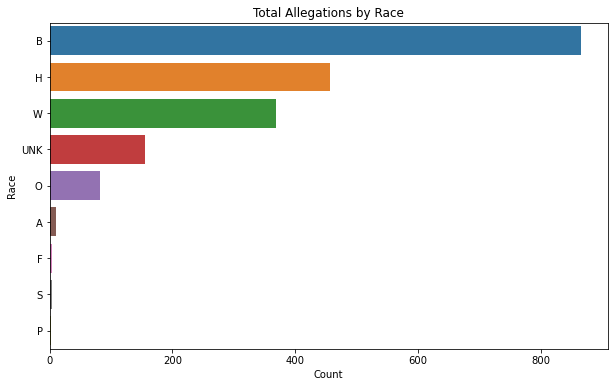

In [ ]:
tot = pd.DataFrame(allyrs['complainant_race'].value_counts().reset_index())
tot.columns = ['race', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot, x='count', y='race')
plt.title('Total Allegations by Race')
plt.xlabel('Count')
plt.ylabel('Race')
plt.show()


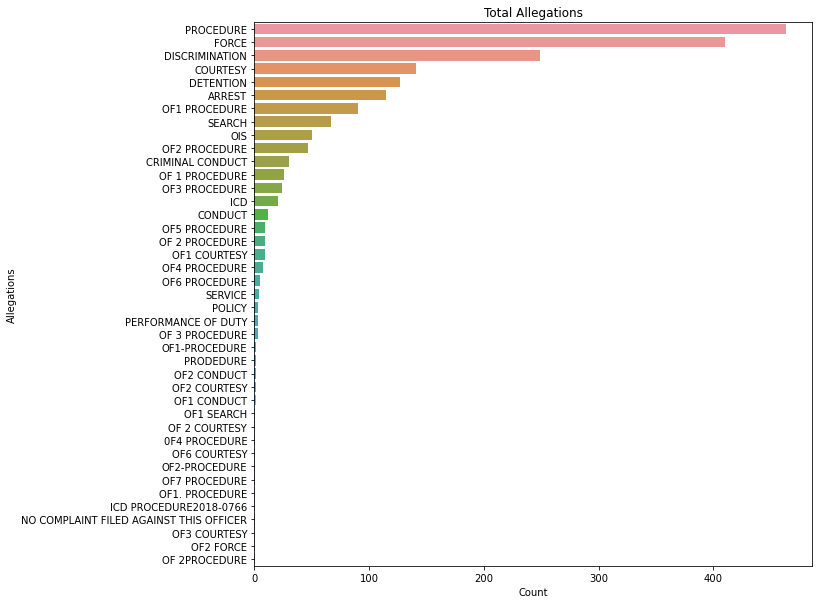

In [ ]:
tot = pd.DataFrame(allyrs['allegation'].value_counts().reset_index())
tot.columns = ['allegation', 'count']

# Create the bar plot
plt.figure(figsize=(10, 10))
sns.barplot(data=tot, x='count', y='allegation')
plt.title('Total Allegations')
plt.xlabel('Count')
plt.ylabel('Allegations')
plt.show()

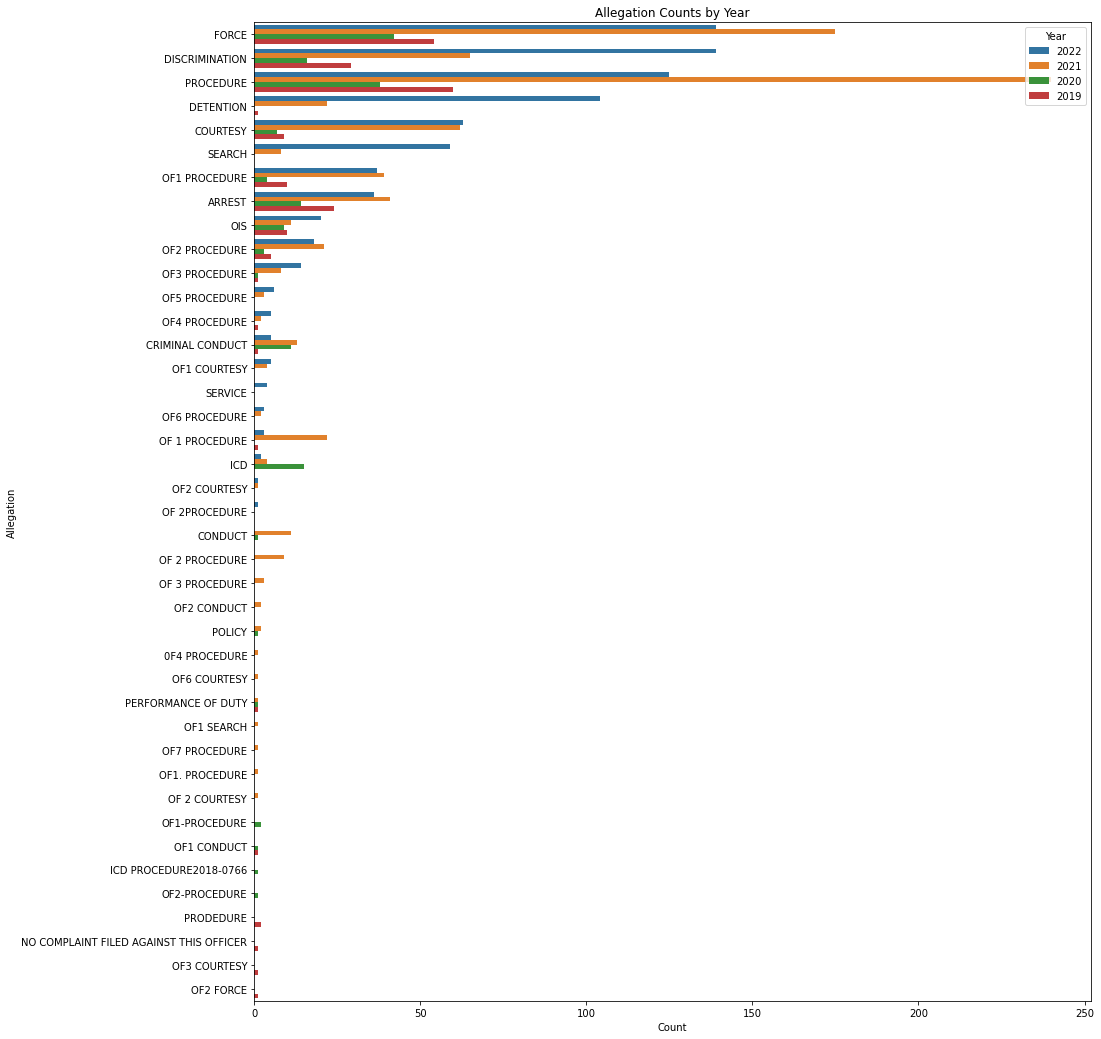

In [ ]:
# Calculate the allegation counts for each year
alleg_count_22 = fy22['allegation'].value_counts()
alleg_count_21 = fy21['allegation'].value_counts()
alleg_count_20 = fy20['allegation'].value_counts()
alleg_count_19 = fy19['allegation'].value_counts()

# Combine the counts into a single DataFrame
alleg_counts = pd.concat([alleg_count_22, alleg_count_21, alleg_count_20, alleg_count_19], axis=1)
alleg_counts.columns = ['2022', '2021', '2020', '2019']

# Reshape the data into a long format
alleg_counts_long = alleg_counts.stack().reset_index()
alleg_counts_long.columns = ['Allegation', 'Year', 'Count']

# Create the bar plot
plt.figure(figsize=(15, 18))
sns.barplot(data=alleg_counts_long, x='Count', y='Allegation', hue='Year')
plt.title('Allegation Counts by Year')
plt.xlabel('Count')
plt.ylabel('Allegation')
plt.legend(title='Year')
plt.show()


## IA and CRB findings

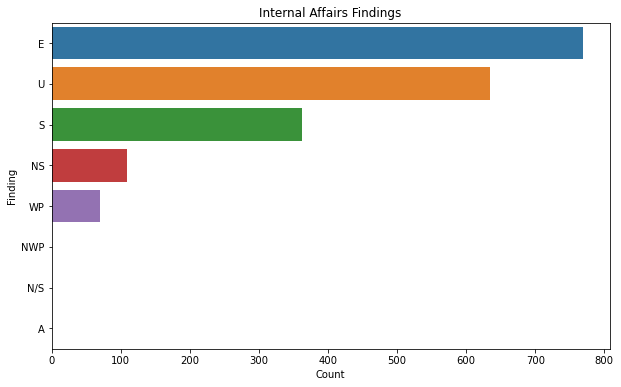

In [ ]:
tot = pd.DataFrame(allyrs['ia_finding'].value_counts().reset_index())
tot.columns = ['ia_finding', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot, x='count', y='ia_finding')
plt.title('Internal Affairs Findings')
plt.xlabel('Count')
plt.ylabel('Finding')
plt.show()


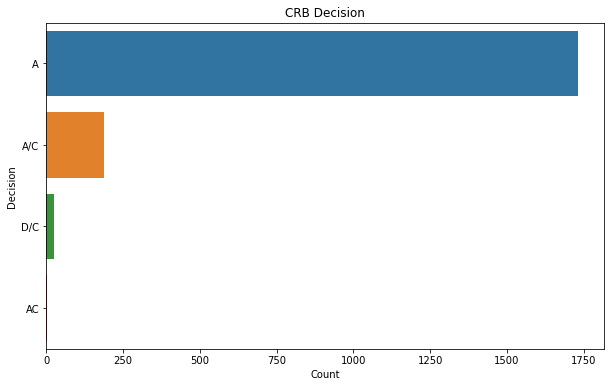

In [ ]:
tot = pd.DataFrame(allyrs['crb_decision'].value_counts().reset_index())
tot.columns = ['crb_decision', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot, x='count', y='crb_decision')
plt.title('CRB Decision')
plt.xlabel('Count')
plt.ylabel('Decision')
plt.show()

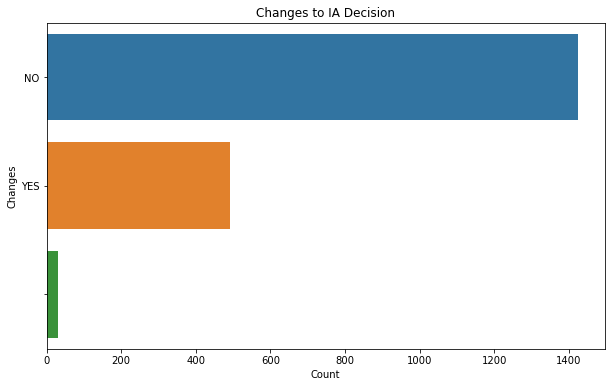

In [ ]:
tot = pd.DataFrame(allyrs['changes'].value_counts().reset_index())
tot.columns = ['changes', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot, x='count', y='changes')
plt.title('Changes to IA Decision')
plt.xlabel('Count')
plt.ylabel('Changes')
plt.show()

In [ ]:
allyrs.to_csv('C:/Users/earne/OneDrive - University of San Diego/MSADS/ADS-599/git/ADS599_Team1/allyrs.csv', index=False)

## Feature Engineering

In [ ]:
crb_disagree = allyrs[allyrs['crb_decision'] == 'D/C']
crb_disagree

,id,case_number,allegation,ia_finding,crb_decision,unanimous_vote,date_assigned,date_presented,pd_division,complainant_race,complainant_gender,changes,crb_viewed_bwc,misconduct
28,19-46,2018-0257,PROCEDURE,NS,D/C,NO,12/12/18,4/23/19,EASTERN,B,M,YES,NO,1
61,19-34,2017-0603,ARREST,E,D/C,NO,10/17/18,2/26/19,SOUTHEASTERN,B,M,NO,NO,1
154,19-14,2017-0255,FORCE,E,D/C,NO,5/7/18,10/30/18,SOUTHERN,W,M,NO,NO,1
155,19-14,2017-0255,PROCEDURE,U,D/C,NO,5/7/18,10/30/18,SOUTHERN,W,M,NO,NO,1
174,19-08,2018-0046,ARREST,E,D/C,NO,6/19/18,9/11/18,CENTRAL,B,M,NO,NO,1
204,19-03,2017-0914,PROCEDURE,U,D/C,YES,3/2/18,7/10/18,WESTERN,W,M,NO,NO,1
354,20-06,2017-0916,FORCE,E,D/C,NO,2019-03-07,2019-08-13,EASTERN,W,M,YES,YES,1
582,21-113,2019-0594,ARREST,E,D/C,YES,2019-12-19,2021-05-25,EASTERN,B,M,YES,YES,1
674,21-121,2020-0051,DISCRIMINATION,NS,D/C,NO,2021-01-14,2021-06-29,MID-CITY,B,F,YES,YES,1
675,21-121,2020-0051,DISCRIMINATION,NS,D/C,NO,2021-01-14,2021-06-29,MID-CITY,B,F,YES,YES,1


In [ ]:
misconduct = allyrs[allyrs['misconduct'] == 1]
len(misconduct)

387

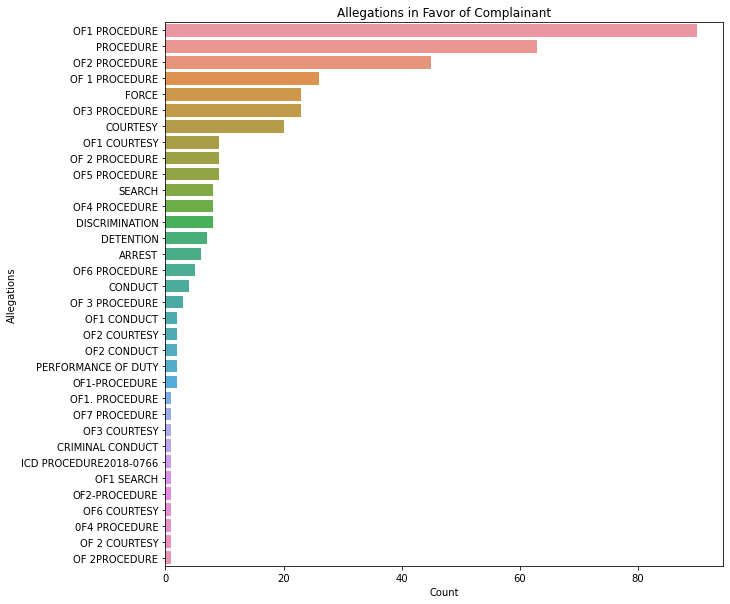

In [ ]:
tot = pd.DataFrame(misconduct['allegation'].value_counts().reset_index())
tot.columns = ['allegation', 'count']

# Create the bar plot
plt.figure(figsize=(10, 10))
sns.barplot(data=tot, x='count', y='allegation')
plt.title('Allegations in Favor of Complainant')
plt.xlabel('Count')
plt.ylabel('Allegations')
plt.show()

In [ ]:
allyrs['misconduct'].value_counts()

misconduct
0    1560
1     387
Name: count, dtype: int64

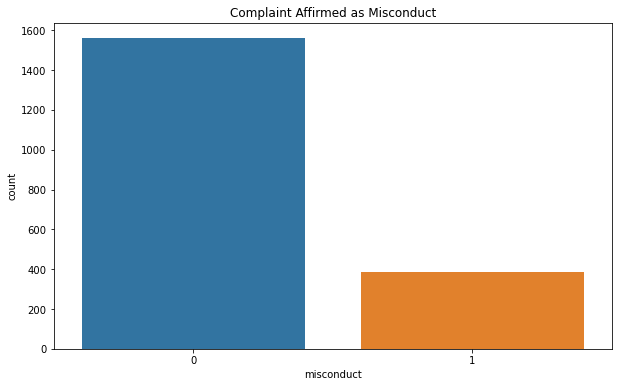

In [ ]:
tot = pd.DataFrame(allyrs['misconduct'].value_counts().reset_index())
tot.columns = ['misconduct', 'count']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=tot, x='misconduct', y='count')
plt.title('Complaint Affirmed as Misconduct')
plt.xlabel('misconduct')
plt.ylabel('count')
plt.show()

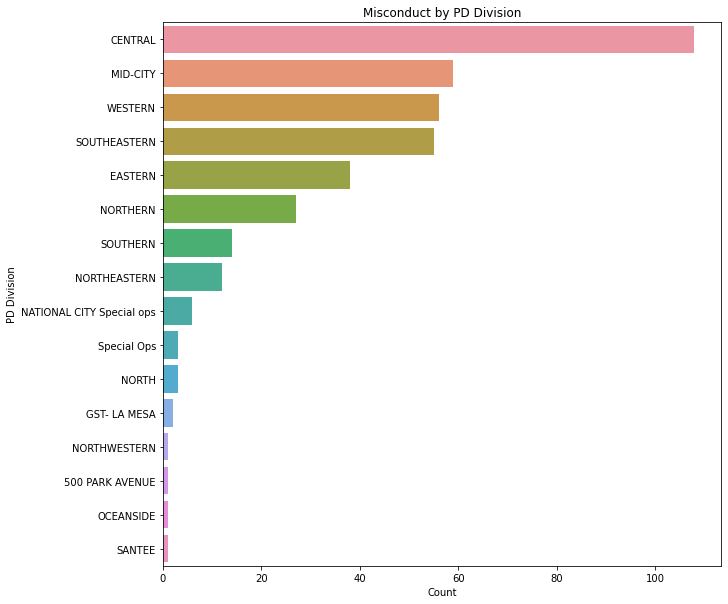

In [ ]:
tot = pd.DataFrame(misconduct['pd_division'].value_counts().reset_index())
tot.columns = ['pd_division', 'count']

# Create the bar plot
plt.figure(figsize=(10, 10))
sns.barplot(data=tot, x='count', y='pd_division')
plt.title('Misconduct by PD Division')
plt.xlabel('Count')
plt.ylabel('PD Division')
plt.show()